## Application:

On considère le site: www.imdb.com

**1- Analyse du Site Web :**

On considère le site imdb et cette URL : https://www.imdb.com/title/tt0108778/episodes/ .inspectez la structure HTML pour comprendre comment les informations de la série ,ses épisodes et les différentes saisons sont présentées.
Identifiez les balises HTML, les classes et les IDs pertinents qui contiennent les données que vous souhaitez extraire.

**2-Extraction des Informations de Base :**

* 2.1- les épisodes de la saison 1:

Utilisez Beautiful Soup pour envoyer une requête HTTP à la page https://www.imdb.com/title/tt0108778/episodes/  récupérez le contenu HTML.
Récupérez la liste des episodes de la 1ere saison.
Récupérer pour chaque épisode , son numéro, son nom, la date de sortie, la note et la description
 
* 2.2-Récupérer toutes les saisons  

Etendre votre travail précédent pour extraire les les épisodes des 10 saisons de la série



In [2]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://www.imdb.com/title/tt0108778/episodes/'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)

print(url, response.status_code)

https://www.imdb.com/title/tt0108778/episodes/ 200


In [4]:
soup = BeautifulSoup(response.content,'html')

In [5]:
soup.select_one('h2').text

'Friends'

In [6]:
for elem in soup.find_all("div", attrs={"class":"ipc-title__text"}):
    
    #print(elem.text)
    saison=elem.text.split(".")[0]
    ep_num=(elem.text.split(".")[1]).split(" ∙ ")[0]
    ep_name= (elem.text.split(".")[1]).split(" ∙ ")[1]
    print(saison,ep_num,ep_name)    

S1 E1 The One Where Monica Gets a Roommate
S1 E2 The One with the Sonogram at the End
S1 E3 The One with the Thumb
S1 E4 The One with George Stephanopoulos
S1 E5 The One with the East German Laundry Detergent
S1 E6 The One with the Butt
S1 E7 The One with the Blackout
S1 E8 The One Where Nana Dies Twice
S1 E9 The One Where Underdog Gets Away
S1 E10 The One with the Monkey
S1 E11 The One with Mrs
S1 E12 The One with the Dozen Lasagnas
S1 E13 The One with the Boobies
S1 E14 The One with the Candy Hearts
S1 E15 The One with the Stoned Guy
S1 E16 The One with Two Parts: Part 1
S1 E17 The One with Two Parts: Part 2
S1 E18 The One with All the Poker
S1 E19 The One Where the Monkey Gets Away
S1 E20 The One with the Evil Orthodontist
S1 E21 The One with the Fake Monica
S1 E22 The One with the Ick Factor
S1 E23 The One with the Birth
S1 E24 The One Where Rachel Finds Out


In [8]:
url= f'https://www.imdb.com/title/tt0108778/episodes/?season=1'
res= requests.get(url, headers=headers)
soup= BeautifulSoup(res.content, 'html')

In [7]:
saison_details=[]
for element in soup.find_all("div",attrs={"class":"sc-ccd6e31b-4 eMYVLm"}):
    
    elem = BeautifulSoup(str(element), "lxml")
    ep_details=[]
    elem1=elem.find("div", attrs={"class":"ipc-title__text"})
    
    saison=elem1.text.split(".")[0]
    ep_num=(elem1.text.split(".")[1]).split(" ∙ ")[0]
    ep_name= (elem1.text.split(".")[1]).split(" ∙ ")[1]
    
    elem2 = elem.find('span', class_="sc-ccd6e31b-10 fVspdm")
    date=elem2.text.strip()
    
    elem3= elem.find('svg', class_="ipc-icon ipc-icon--star-inline").find_next_sibling(text=True)
    note =elem3.strip()
    
    elem4= elem.find("div", attrs={"class":"ipc-html-content-inner-div"})
    description= elem4.text
    ep_details.append(saison)
    ep_details.append(ep_num)
    ep_details.append(ep_name)
    ep_details.append(date)
    ep_details.append(note)
    ep_details.append(description)
    
    saison_details.append(ep_details)
    
print(len(saison_details))
titres_episodes = [episode[2] for episode in saison_details]
print(titres_episodes)    

24
['The One Where Monica Gets a Roommate', 'The One with the Sonogram at the End', 'The One with the Thumb', 'The One with George Stephanopoulos', 'The One with the East German Laundry Detergent', 'The One with the Butt', 'The One with the Blackout', 'The One Where Nana Dies Twice', 'The One Where Underdog Gets Away', 'The One with the Monkey', 'The One with Mrs', 'The One with the Dozen Lasagnas', 'The One with the Boobies', 'The One with the Candy Hearts', 'The One with the Stoned Guy', 'The One with Two Parts: Part 1', 'The One with Two Parts: Part 2', 'The One with All the Poker', 'The One Where the Monkey Gets Away', 'The One with the Evil Orthodontist', 'The One with the Fake Monica', 'The One with the Ick Factor', 'The One with the Birth', 'The One Where Rachel Finds Out']


In [9]:
def extract_info(soup):
    saison_details=[]
    for element in soup.find_all("div",attrs={"class":"sc-ccd6e31b-4 eMYVLm"}):

        elem = BeautifulSoup(str(element), "lxml")
        ep_details=[]
        elem1=elem.find("div", attrs={"class":"ipc-title__text"})

        saison=elem1.text.split(".")[0]
        ep_num=(elem1.text.split(".")[1]).split(" ∙ ")[0]
        ep_name= (elem1.text.split(".")[1]).split(" ∙ ")[1]

        elem2 = elem.find('span', class_="sc-ccd6e31b-10 fVspdm")
        date=elem2.text.strip()

        elem3= elem.find('svg', class_="ipc-icon ipc-icon--star-inline").find_next_sibling(text=True)
        note =elem3.strip()

        elem4= elem.find("div", attrs={"class":"ipc-html-content-inner-div"})
        description= elem4.text
        ep_details.append(saison)
        ep_details.append(ep_num)
        ep_details.append(ep_name)
        ep_details.append(date)
        ep_details.append(note)
        ep_details.append(description)

        saison_details.append(ep_details)

    titres_episodes = [episode[2] for episode in saison_details]
    return(saison_details,titres_episodes)

In [9]:
saison1=[]
titres_episodes=[]
url= f'https://www.imdb.com/title/tt0108778/episodes/?season=3'
res= requests.get(url, headers=headers)
soup1= BeautifulSoup(res.content, 'html')
saison1,titres_episodes= extract_info(soup1)
print(len(saison1))
print(titres_episodes)

25
['The One with the Princess Leia Fantasy', "The One Where No One's Ready", 'The One with the Jam', 'The One with the Metaphorical Tunnel', 'The One with Frank Jr', 'The One with the Flashback', 'The One with the Race Car Bed', 'The One with the Giant Poking Device', 'The One with the Football', 'The One Where Rachel Quits', "The One Where Chandler Can't Remember Which Sister", 'The One with All the Jealousy', 'The One Where Monica and Richard Are Just Friends', "The One with Phoebe's Ex-Partner", 'The One Where Ross and Rachel Take a Break', 'The One with the Morning After', 'The One Without the Ski Trip', 'The One with the Hypnosis Tape', 'The One with the Tiny T-Shirt', 'The One with the Dollhouse', 'The One with the Chick and the Duck', 'The One with the Screamer', "The One with Ross's Thing", 'The One with the Ultimate Fighting Champion', 'The One at the Beach']


In [16]:
saisons=[]

for id_saison in range(1, 11):
    url= f'https://www.imdb.com/title/tt0108778/episodes?season={id_saison}'
    res= requests.get(url, headers=headers)
    
    soup1= BeautifulSoup(res.content, 'html')
    ss=[]
    ss,ep=extract_info(soup1)
    
    print("saison",id_saison,len(ep),"episodes")
    print(ep)
    
    saisons.append({
            "saison": id_saison,
            "nb_episodes": len(ep),
              })

    time.sleep(1)
    
print("===> ",len(saisons),"saisons")

saison 1 24 episodes
['The One Where Monica Gets a Roommate', 'The One with the Sonogram at the End', 'The One with the Thumb', 'The One with George Stephanopoulos', 'The One with the East German Laundry Detergent', 'The One with the Butt', 'The One with the Blackout', 'The One Where Nana Dies Twice', 'The One Where Underdog Gets Away', 'The One with the Monkey', 'The One with Mrs', 'The One with the Dozen Lasagnas', 'The One with the Boobies', 'The One with the Candy Hearts', 'The One with the Stoned Guy', 'The One with Two Parts: Part 1', 'The One with Two Parts: Part 2', 'The One with All the Poker', 'The One Where the Monkey Gets Away', 'The One with the Evil Orthodontist', 'The One with the Fake Monica', 'The One with the Ick Factor', 'The One with the Birth', 'The One Where Rachel Finds Out']
saison 2 24 episodes
["The One with Ross's New Girlfriend", 'The One with the Breast Milk', 'The One Where Heckles Dies', "The One with Phoebe's Husband", 'The One with Five Steaks and an Eg

In [23]:
df = pd.DataFrame(saisons)

df

,saison,nb_episodes
0,1,24
1,2,24
2,3,25
3,4,24
4,5,24
5,6,25
6,7,24
7,8,24
8,9,23
9,10,17


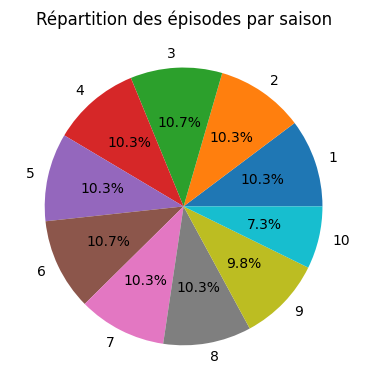

In [66]:
episode_counts = df['nb_episodes'].sort_index()

plt.figure(figsize=(4, 4))
plt.pie(episode_counts, labels=episode_counts.index+1, autopct='%1.1f%%', colors=sns.color_palette('tab10'))
plt.title('Répartition des épisodes par saison')
plt.tight_layout()

In [39]:
episode_data = []

for a in range(1, 11):
    url= f'https://www.imdb.com/title/tt0108778/episodes?season={a}'
    print(url)
    res= requests.get(url, headers=headers)
    soup= BeautifulSoup(res.content, 'html')

    all_elements = soup.find_all("div", class_="sc-ccd6e31b-4 eMYVLm")
    print(len(all_elements))
    for elts in all_elements:
        EPs = elts.find("div", class_="ipc-title__text")

        ssep, title = EPs.text.split(" ∙ ")
        ss, n_ep = ssep.split(".")
        

        dates = elts.find('span', class_="sc-ccd6e31b-10 fVspdm")
        date = dates.text.strip() if dates else 'N/A'
        #print(date)

        svgs = elts.find_all('svg', class_="ipc-icon ipc-icon--star-inline")
        note = 'N/A'
        for svg in svgs:
            textn = svg.find_next_sibling(text=True)
            if textn:
                note = textn.strip()
                break

        episode_data.append({
            "saison": ss,
            "episode": n_ep,
            "titre": title,
            "date": date,
            "note": note
        })

    time.sleep(1)

len(episode_data)

https://www.imdb.com/title/tt0108778/episodes?season=1
24
https://www.imdb.com/title/tt0108778/episodes?season=2
24
https://www.imdb.com/title/tt0108778/episodes?season=3
25
https://www.imdb.com/title/tt0108778/episodes?season=4
24
https://www.imdb.com/title/tt0108778/episodes?season=5
24
https://www.imdb.com/title/tt0108778/episodes?season=6
25
https://www.imdb.com/title/tt0108778/episodes?season=7
24
https://www.imdb.com/title/tt0108778/episodes?season=8
24
https://www.imdb.com/title/tt0108778/episodes?season=9
23
https://www.imdb.com/title/tt0108778/episodes?season=10
17


234

In [40]:
df_global = pd.DataFrame(episode_data)

df_global.head()

,saison,episode,titre,date,note
0,S1,E1,The One Where Monica Gets a Roommate,"Mon, Apr 15, 1996",8.1
1,S1,E2,The One with the Sonogram at the End,"Wed, Sep 28, 1994",7.9
2,S1,E3,The One with the Thumb,"Wed, Oct 5, 1994",8.0
3,S1,E4,The One with George Stephanopoulos,"Wed, Oct 12, 1994",7.9
4,S1,E5,The One with the East German Laundry Detergent,"Wed, Oct 19, 1994",8.3


In [41]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   saison   234 non-null    object
 1   episode  234 non-null    object
 2   titre    234 non-null    object
 3   date     234 non-null    object
 4   note     234 non-null    object
dtypes: object(5)
memory usage: 9.3+ KB


In [42]:
df_global['note'] = df_global['note'].astype(float)
df_global['saison'] = df_global['saison'].str.extract('(\d+)').astype(int)
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   saison   234 non-null    int32  
 1   episode  234 non-null    object 
 2   titre    234 non-null    object 
 3   date     234 non-null    object 
 4   note     234 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 8.4+ KB


In [43]:
df_global.head()

,saison,episode,titre,date,note
0,1,E1,The One Where Monica Gets a Roommate,"Mon, Apr 15, 1996",8.1
1,1,E2,The One with the Sonogram at the End,"Wed, Sep 28, 1994",7.9
2,1,E3,The One with the Thumb,"Wed, Oct 5, 1994",8.0
3,1,E4,The One with George Stephanopoulos,"Wed, Oct 12, 1994",7.9
4,1,E5,The One with the East German Laundry Detergent,"Wed, Oct 19, 1994",8.3


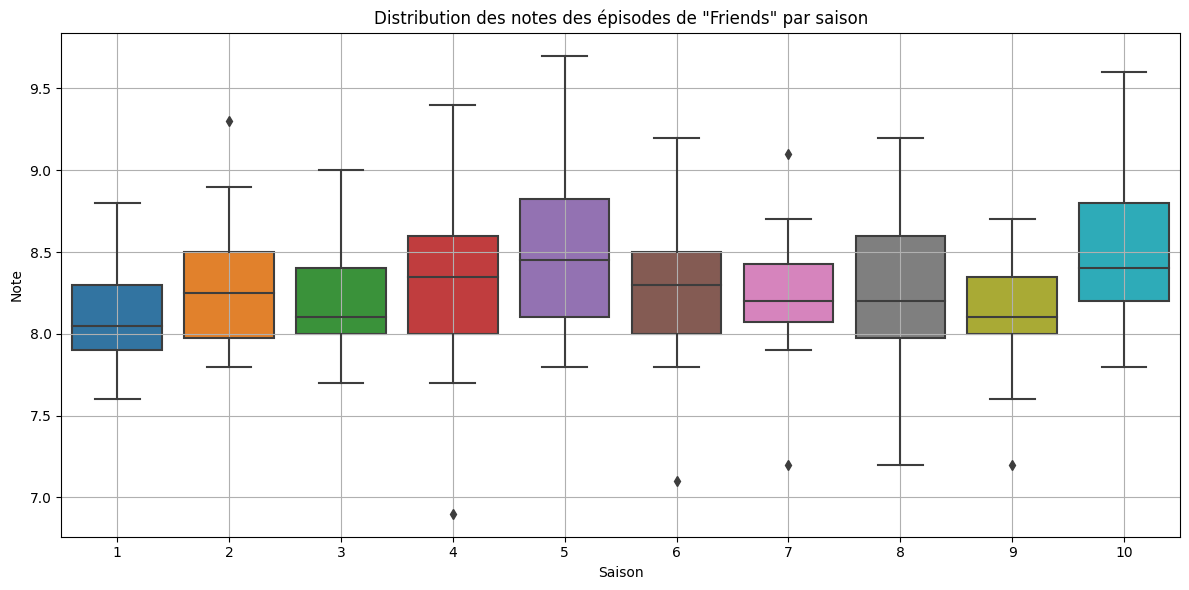

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_global, x='saison', y='note', palette='tab10')
plt.title('Distribution des notes des épisodes de "Friends" par saison')
plt.xlabel('Saison')
plt.ylabel('Note')
plt.grid(True)
plt.tight_layout()

plt.show()

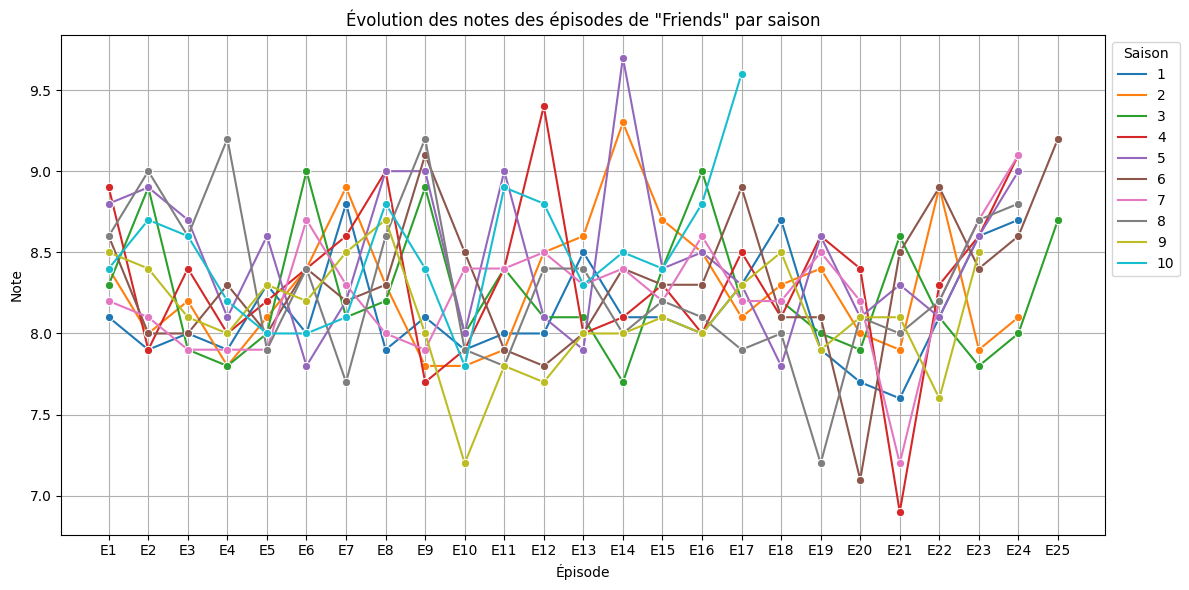

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_global, x='episode', y='note', hue='saison', marker='o', palette='tab10')
plt.title('Évolution des notes des épisodes de "Friends" par saison')
plt.xlabel('Épisode')
plt.ylabel('Note')
plt.legend(title='Saison', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()